In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

In [11]:
#Generate the dataset
#X:サンプル, y:整数ラベル0 or 1
X, y = make_moons(n_samples=100, shuffle=True, noise=0.4, random_state=10)
print('Original : {}'.format(Counter(y)))
print(X)
print(y)

#convert to imbalanced data, arg3:imbalanced ratio
X_, y_ = make_imbalance(X, y, 0.3, min_c_=1)
print('Imbalanced : {}'.format(Counter(y_)))

#Apply SMOTE
sm = SMOTE(ratio='auto', random_state=None, k=None, k_neighbors=5, m=None, 
           m_neighbors=10, out_step=0.5, kind='regular', svm_estimator=None, n_jobs=1)
X_smt, y_smt = sm.fit_sample(X_, y_)
print('SMOTE : {}'.format(Counter(y_smt)))

#Apply borderline1
bl1 = SMOTE(ratio='auto', random_state=None, k=None, k_neighbors=5, m=None, 
           m_neighbors=10, out_step=0.5, kind='borderline1', svm_estimator=None, n_jobs=1)
X_b1, y_b1 = sm.fit_sample(X_, y_)
print('Borderline1 : {}'.format(Counter(y_b1)))

#Apply borderline2
bl2 = SMOTE(ratio='auto', random_state=None, k=None, k_neighbors=5, m=None, 
           m_neighbors=10, out_step=0.5, kind='borderline2', svm_estimator=None, n_jobs=1)
X_b2, y_b2 = sm.fit_sample(X_, y_)
print('Borderline2 : {}'.format(Counter(y_b2)))

#Apply adasyn
ada = ADASYN(ratio='auto', random_state=None, k=None, n_neighbors=5, n_jobs=1)
X_ada, y_ada = ada.fit_sample(X_, y_)
print('ADASYN : {}'.format(Counter(y_ada)))

#Apply random over-sampling
rdm = RandomOverSampler(ratio='auto', random_state=None)
X_rdm, y_rdm = rdm.fit_sample(X_, y_)
print('Random over-sampling : {}'.format(Counter(y_rdm)))

Original : Counter({0: 50, 1: 50})
[[ -3.74064155e-01   6.64385486e-01]
 [  5.95422547e-02   1.28279092e+00]
 [ -7.39091652e-01   5.06035664e-01]
 [  5.06793245e-03   1.30455352e-01]
 [  1.49092947e+00  -2.16215643e-01]
 [  6.26615352e-01  -2.32688269e-01]
 [  1.42370817e+00  -1.08213363e+00]
 [ -1.26933511e+00   1.53917856e+00]
 [ -8.97800528e-01   5.83390733e-01]
 [  7.68400460e-01  -4.16210006e-01]
 [  2.45901459e-01  -1.15213182e-01]
 [  2.04559547e+00   3.29507401e-01]
 [  7.95231912e-01  -1.73168524e-01]
 [  2.73041874e-01   9.55844625e-01]
 [  1.92650499e+00   1.19913086e-01]
 [  2.57369141e-01  -2.75279083e-01]
 [  2.72103214e+00   1.24425855e-01]
 [ -3.95819109e-01   8.71322804e-01]
 [ -3.33960345e-01  -2.82926427e-01]
 [ -1.15682829e+00   3.03731734e-01]
 [  1.75560024e+00   6.22245829e-01]
 [  2.84718362e-01  -3.38558733e-01]
 [  2.01209511e-01   6.17683394e-02]
 [ -1.55751218e+00   4.09548982e-01]
 [  1.37488225e+00  -5.73699624e-01]
 [  9.89008163e-02   4.90489937e-01]
 [ 

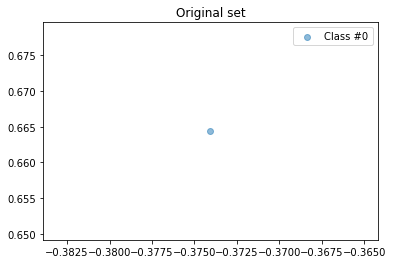

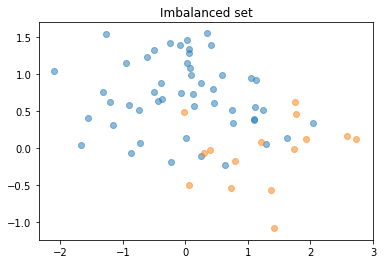

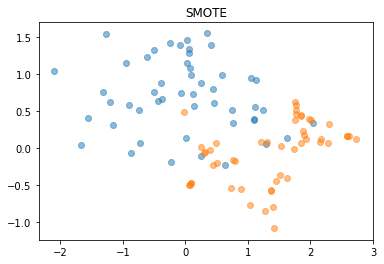

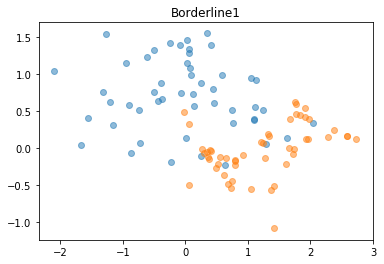

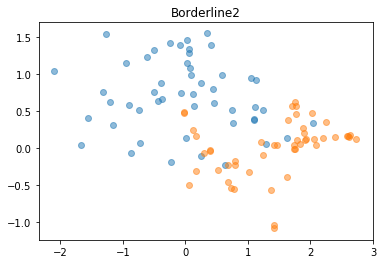

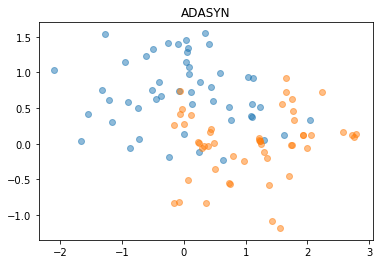

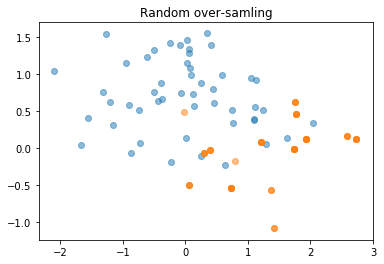

In [7]:
#show original data
fig = plt.figure()
ax = fig.add_subplot(111)
#X[0][0] -> X[0, 0]
ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
ax.set_title('Original set')
plt.legend()

#show imbalanced data
fig1= plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(X_[y_ == 0, 0], X_[y_ == 0, 1], label="Class #0", alpha=0.5)
ax1.scatter(X_[y_ == 1, 0], X_[y_ == 1, 1], label="Class #1", alpha=0.5)
ax1.set_title('Imbalanced set')

#show smote
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(X_smt[y_smt == 0, 0], X_smt[y_smt == 0, 1], label="Class #0", alpha=0.5)
ax2.scatter(X_smt[y_smt == 1, 0], X_smt[y_smt == 1, 1], label="Class #1", alpha=0.5)
ax2.set_title('SMOTE')

#show borderline1
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(X_b1[y_b1 == 0, 0], X_b1[y_b1 == 0, 1], label="Class #0", alpha=0.5)
ax3.scatter(X_b1[y_b1 == 1, 0], X_b1[y_b1 == 1, 1], label="Class #1", alpha=0.5)
ax3.set_title('Borderline1')

#show borderline2
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.scatter(X_b2[y_b2 == 0, 0], X_b2[y_b2 == 0, 1], label="Class #0", alpha=0.5)
ax4.scatter(X_b2[y_b2 == 1, 0], X_b2[y_b2 == 1, 1], label="Class #1", alpha=0.5)
ax4.set_title('Borderline2')

#show ADASYN
fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.scatter(X_ada[y_ada == 0, 0], X_ada[y_ada == 0, 1], label="Class #0", alpha=0.5)
ax5.scatter(X_ada[y_ada == 1, 0], X_ada[y_ada == 1, 1], label="Class #1", alpha=0.5)
ax5.set_title('ADASYN')

#show random over-sampling.
fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
ax6.scatter(X_rdm[y_rdm == 0, 0], X_rdm[y_rdm == 0, 1], label="Class #0", alpha=0.5)
ax6.scatter(X_rdm[y_rdm == 1, 0], X_rdm[y_rdm == 1, 1], label="Class #1", alpha=0.5)
ax6.set_title('Random over-samling')

 
plt.show()